---
### Box-Cox Transformation of Yelp Business Review Counts
---

- The Box-Cox  transform assumes that input data is positive.

In [1]:
# Import Library

import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

In [2]:
# Load business data 

biz_data = open('../data/yelp_dataset/yelp_academic_dataset_business.json', 
                        encoding='utf-8')

In [3]:
# create a pandas dataframe of the data

bizdf = pd.DataFrame([json.loads(x) for x in biz_data.readlines()])
biz_data.close()

In [4]:
## Check th minimum to make sure input data is positive

bizdf['review_count'].min()

3

In [5]:
# Import Scipy

from scipy import stats

In [7]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
# box-cox transform

rc_log = stats.boxcox(bizdf['review_count'], lmbda=0)

In [8]:
# By default, the scipy implementation of Box-Cox transform finds the lmbda parameter
# that will make the output the closest to a normal distribution

rc_bc, bc_params = stats.boxcox(bizdf['review_count'])
bc_params

-0.3809438089654094

In [9]:
bizdf['rc_log'] = rc_log
bizdf['rc_bc'] = rc_bc

Text(0,0.5,'Occurrence')

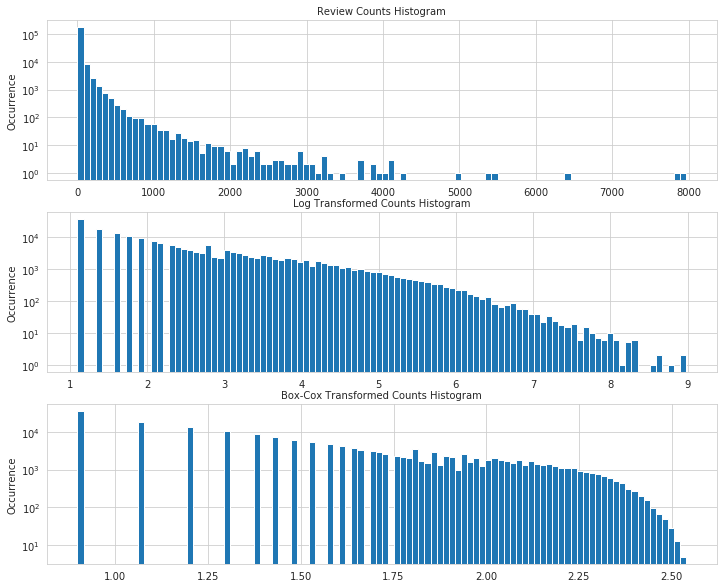

In [10]:
# Visualizing the distribution of review counts before and after appying the log transform

plt.figure(figsize=(12,10))

# original review count histogram
ax = plt.subplot(3,1,1)
bizdf['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=10)
ax.set_title('Review Counts Histogram', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Occurrence', fontsize=10)


# review count after log transform
ax = plt.subplot(3,1,2)
bizdf['rc_log'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=10)
ax.set_title('Log Transformed Counts Histogram', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Occurrence', fontsize=10)

# review count after optimal Box-Cox transform
ax = plt.subplot(3,1,3)
bizdf['rc_bc'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=10)
ax.set_title('Box-Cox Transformed Counts Histogram', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Occurrence', fontsize=10)


Text(0.5,1,'Probplot after Box-Cox transform')

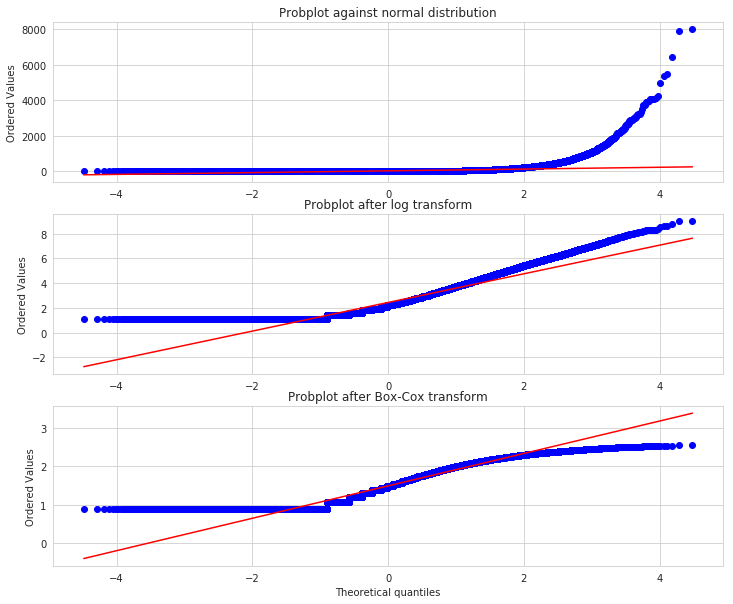

In [12]:
# Probability plots of original and transformed counts against the normal distribution
plt.figure(figsize=(12,10))

# original review count histogram
ax = plt.subplot(3,1,1)
prob1 = stats.probplot(bizdf['review_count'], dist=stats.norm, plot=ax)
ax.set_xlabel('')
ax.set_title('Probplot against normal distribution')

ax = plt.subplot(3,1,2)
prob2 = stats.probplot(bizdf['rc_log'], dist=stats.norm, plot=ax)
ax.set_xlabel('')
ax.set_title('Probplot after log transform')

ax = plt.subplot(3,1,3)
prob3 = stats.probplot(bizdf['rc_bc'], dist=stats.norm, plot=ax)
ax.set_xlabel('Theoretical quantiles')
ax.set_title('Probplot after Box-Cox transform')